In [1]:
import pandas as pd
import geopandas as gpd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm

In [2]:
# set the path to the root directory of the git
path_root = r'C:/Users/miln/tubCloud/Work-in-progress/main-project/new_git'

# enable python to find the modules
sys.path.append(path_root)

In [3]:
crs = 25833

# Plot with quadrat

In [4]:
path = 'ber_results.csv'
ber = import_csv_w_wkt_to_gdf(path, crs=crs)

In [40]:
path = 'ber_sample_results.csv'
ber_sample = import_csv_w_wkt_to_gdf(path, crs=crs)

In [6]:
path = r'E:\ML_paper\Data\2-data_preprocessed\Germany\Berlin\Berlin\Berlin_boundaries.csv'
city_boundaries = import_csv_w_wkt_to_gdf(path, crs=crs)

In [7]:
ber = ber[['id','geometry','error']]
ber_sample = ber_sample[['id','error']]

In [8]:
ber = ber.merge(ber_sample, left_on='id', right_on='id',how='left')

In [9]:
ber['difference'] = ber['error_x'] - ber['error_y']

In [10]:
n = 80

# get the bounds
bounds = city_boundaries.iloc[0].geometry.bounds
# get min length
min_len_boundaries = min(bounds[2] - bounds[0], bounds[3] - bounds[1])

# cut i ~n parts
geometry_cut = ox.quadrat_cut_geometry(city_boundaries.iloc[0].geometry, min_num=n, quadrat_width=min_len_boundaries)

# explode the multipolygon with the parts in a geoseries with individual polygons
geometry_cut_parts = gpd.GeoSeries(geometry_cut).explode()

In [41]:
geometry_cut_df = gpd.GeoDataFrame(geometry=geometry_cut_parts)

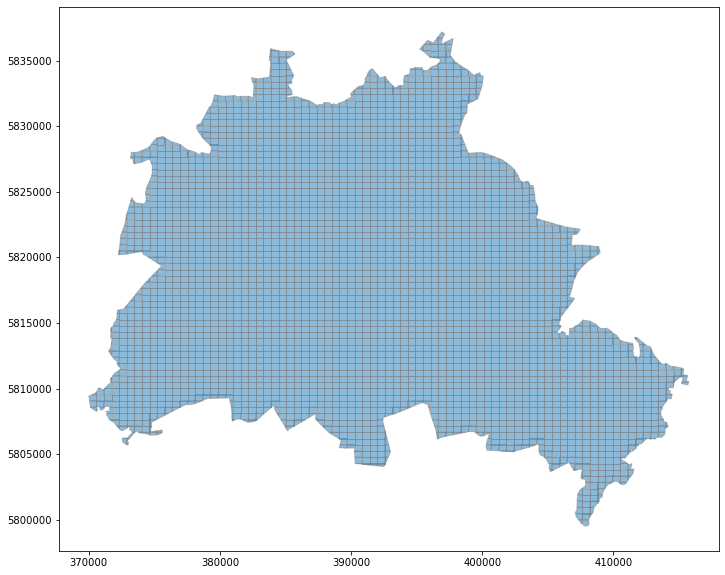

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
geometry_cut_df.plot(ax=ax,alpha=0.5, linewidth=1,edgecolor='grey',legend=True)
plt.show()

In [33]:
city_cut = gpd.sjoin(ber, geometry_cut_df, how='left', op='within')

<ipython-input-33-3fb9e1c88975>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:25833
Right CRS: None

  city_cut = gpd.sjoin(ber, geometry_cut_df, how='left', op='within')


In [34]:
errors_cut = pd.DataFrame(city_cut.groupby('index_right1')['error_x'].mean())

In [35]:
geometry_cut_df.index = geometry_cut_df.index.droplevel(0)
geometry_cut_df['index_left'] = geometry_cut_df.index

In [36]:
geometry_cut_df = geometry_cut_df.merge(errors_cut, left_on='index_left', right_on='index_right1',how='left')

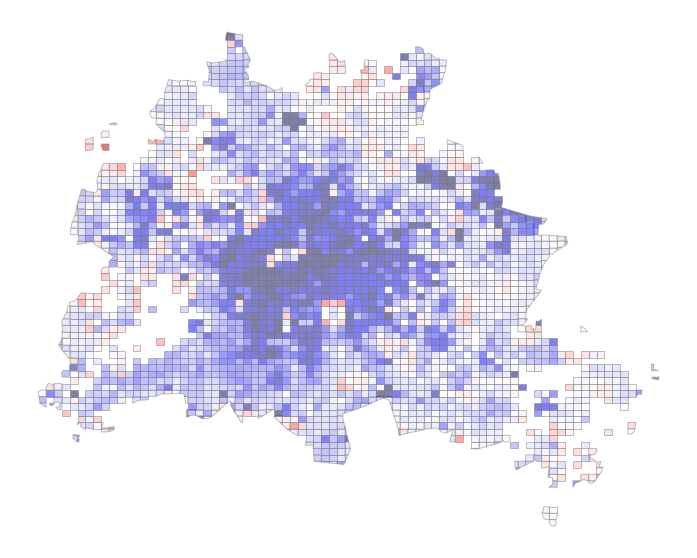

In [27]:
divnorm = DivergingNorm(vmin=-10, vcenter=0, vmax=10)

fig, ax = plt.subplots(figsize=(20,10))
geometry_cut_df.plot(ax=ax, column='error_x',alpha=0.5, linewidth=1,edgecolor='grey',cmap='seismic',
                     legend=False, norm=divnorm
                     )
ax.axis('off')

plt.savefig('Fig5-A.png', dpi=600)

In [37]:
errors_cut = pd.DataFrame(city_cut.groupby('index_right1')['error_y'].mean())

In [42]:
city_cut = gpd.sjoin(ber_sample, geometry_cut_df, how='left', op='within')

<ipython-input-42-26d6ad0f7a9d>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:25833
Right CRS: None

  city_cut = gpd.sjoin(ber_sample, geometry_cut_df, how='left', op='within')


In [43]:
errors_cut = pd.DataFrame(city_cut.groupby('index_right1')['error'].mean())

In [44]:
geometry_cut_df.index = geometry_cut_df.index.droplevel(0)
geometry_cut_df['index_left'] = geometry_cut_df.index

In [45]:
geometry_cut_df = geometry_cut_df.merge(errors_cut, left_on='index_left', right_on='index_right1',how='left')

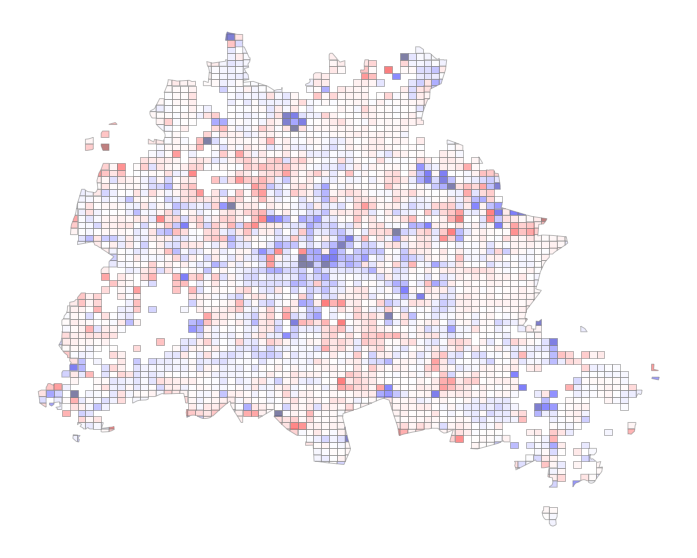

In [48]:
divnorm = DivergingNorm(vmin=-10, vcenter=0, vmax=10)

fig, ax = plt.subplots(figsize=(20,10))
geometry_cut_df.plot(ax=ax, column='error',alpha=0.5, linewidth=1,edgecolor='grey',cmap='seismic',
                     legend=False, norm=divnorm
                     )
ax.axis('off')

plt.savefig('Fig5-B.png', dpi=600,bbox='tight')